# Sentiment Analysis  Using Text Classification Methods
## Introduction



### Why sentiment analysis ?
Sentiment analysis is important as we want to understand the attitude of the writer of the text.
In Industry many companies want to show target ads to a certain group of customers there can be use of sentiment analysis.
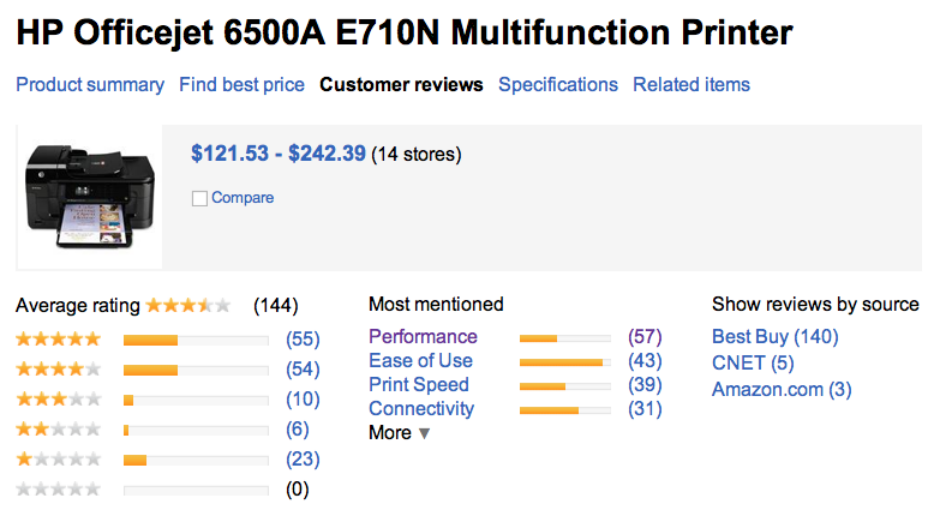


Also for products it can be used to rate them based on certain parameter's which a person looks for while buying up a product for himself

#### In the last US president elections it is said that the person who was the most important person behind president Trump's victory was his nephew who used data driven methods for propoganda

So it is important indicator of views of people of a particular group and can be used for developing strategy.
### What is sentiment?
Sentiment refers to the attitude the text is having for example hate,violence,anger etc they all are considered as sentiments.



### What are the indicators of sentiment ?
The indicators of sentiment are the words that are present in the text.But do all words constitute to the sentiment . For example if we take walking,bathing,using,have,an,the etc. words do they contribute in determining the overall sentiment of the text.


## Scherer Typology of Affective States


* Emotion: brief organically synchronized … evaluation of a major event angry, sad, joyful, fearful, ashamed, proud, elated
* Mood: diffuse non-caused low-intensity long-duration change in subjective feeling cheerful, gloomy, irritable, listless, depressed, buoyant
* Interpersonal stances: affective stance toward another person in a specific interaction friendly, flirtatious, distant, cold, warm, supportive, contemptuous
* Attitudes: enduring, affectively colored beliefs, dispositions towards objects or persons
 liking, loving, hating, valuing, desiring
* Personality traits: stable personality dispositions and typical behavior tendencies nervous, anxious, reckless, morose, hostile, jealous


## Sentiment Analysis The Task
**Simplest task:**
Is the attitude of this text positive or negative?

**More complex:**
Rank the attitude of this text from 1 to 5

**Advanced:**
Detect the target, source, or complex attitude types

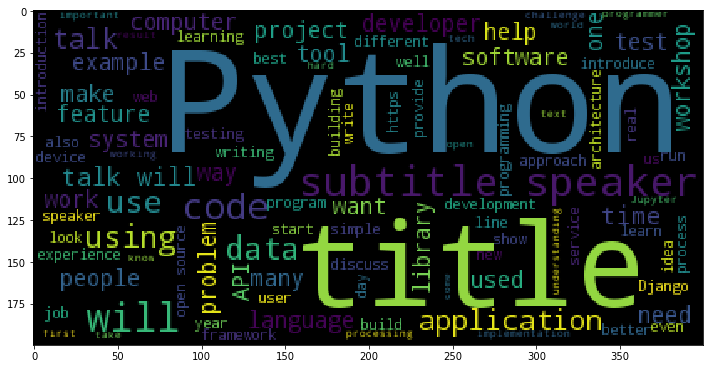

In [2]:
import os

data_dir = os.path.join('..', 'data', 'pyconuk2016')

talk_types = ['keynotes', 'workshops', 'talks']

all_talk_files = [os.path.join(data_dir, talk_type, fname)
                  for talk_type in talk_types
                  for fname in os.listdir(os.path.join(data_dir, talk_type))]

documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname, 'r') as f:
        content = f.read()
        documents[talk_title] = content
        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])
        

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('on')
plt.show()


### WordCloud
The above picture shows us the most frequent words that have been used in the data. This can also serve as medium to express what sentiment is present in the text. The picture above is of word cloud which shows the most frequently occuring words in the text

For example the occurence of words like happy,cool,adventurous etc. there presence in the wordcloud gives us that there is positive sentiment about the text.


## Text Classification
### What is text classification ?
It is the process of classifying texts in certain categories based on what it contains and is usually used for tasks like given below
1. Classifying that a given email is spam or not
2. Categorizing wether a text is written by female or a male author.
3. Identifying the language present in the text
4. Assigning categories for text like sports,political etc.
5. Sentiment Analysis






### Methods used in Text Classification
#### Rule based methods
They include classifying on the basis of certain rules that are made experts who have analyzed the data and know the patterns inside it. 

For example If an email contains words like won,offer,prize etc highly predict that the given email can be a spam mail other features like misspelt spellings also give a hint that a message can be spam.

#### What is the drawback of this?
1. The rules may ain't be able to capture everything.
2. There is need of experts in fields which are not easily available.

#### Can we do better?
With the advent of statistical methods we can capture the patterns in data by making use of probablity based methods which may be able to train themselves on a given text on a language so our model(program) can learn from the data and can predict things on basis of what it has learnt.





In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['rec.sport.hockey', 'soc.religion.christian']
twenty_train = fetch_20newsgroups(subset = 'train',categories = categories,shuffle = True,random_state = 42)


### Data
The data that we require to make our program learn to make predictions can be of different types.

When we have categorical labels for the data and learn from them it is called Supervised method and whereas when we don't have labels for our data the method is called UnSupervised Method.

For the above task I am using the data from news groups which will be categorized in two classes either is it about atheism or christian.


### Representing Data 
The computer doesn't understand what are words it can just deal with mathematical entities like numbers.
To deal with this issue we use different techniques of represention 
1. **Bag Of Words**

This technique represents documents as a collection of word associated with their unique id's and their frequencies .Example-(237,12) The tuple depicts that the word with id 237 has occured 12 times in the document.

#### But is this adequate ? 
For example if a word 'the' occurs a lot more number of times in the text does it depict what the text contains effectively.

2. **Tf-Idf Representation**

In this representation what we have for a particular word is the **term freqency = (count of word in document)/(total words)** which is multiplied by the **inverse document frequency = (log((Number of Documents)/(Documents in which that word occurs)))**.
The idf is based on the fact that if a word which occurs rarely in a documents more correctly describe what the document contains then the words that are present in every document.
Eg. 'NLP' as a term in a document is more indicative of the fact that the data is about NLP as compared to what the occurence of 'have' in a document

Let us convert the data into tf-idf representation

### Should we use all the words as an indicator?
It can be seen that all words used as indicator sometimes produces good results sometimes but it doesn't gurantee things and if we don't have enough data we may fail.

So to deal with this problem we can make use of semantic lexicons which have classified words in different categories by their methods and we can use them as features in our model.



In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfTransformer = TfidfTransformer(use_idf = False)
cVectorizer = CountVectorizer()
x_counts = cVectorizer.fit_transform(twenty_train.data)
X_final_data = tfTransformer.fit_transform(x_counts)
print X_final_data[:5]

  (0, 18935)	0.0365636212064
  (0, 17926)	0.0365636212064
  (0, 4126)	0.0365636212064
  (0, 6448)	0.0365636212064
  (0, 11591)	0.0365636212064
  (0, 21641)	0.0365636212064
  (0, 18714)	0.0365636212064
  (0, 13212)	0.0365636212064
  (0, 11541)	0.0365636212064
  (0, 8992)	0.0365636212064
  (0, 18997)	0.0365636212064
  (0, 8117)	0.0365636212064
  (0, 20404)	0.0365636212064
  (0, 16046)	0.0365636212064
  (0, 17870)	0.0365636212064
  (0, 13776)	0.0365636212064
  (0, 17376)	0.0365636212064
  (0, 12642)	0.0365636212064
  (0, 7540)	0.0731272424127
  (0, 12302)	0.0365636212064
  (0, 18916)	0.0365636212064
  (0, 21342)	0.0365636212064
  (0, 18905)	0.0365636212064
  (0, 5208)	0.0365636212064
  (0, 9894)	0.0365636212064
  :	:
  (4, 19855)	0.0395593886065
  (4, 14317)	0.0395593886065
  (4, 19872)	0.0395593886065
  (4, 19820)	0.0395593886065
  (4, 7491)	0.0395593886065
  (4, 2988)	0.0791187772129
  (4, 12855)	0.0395593886065
  (4, 21624)	0.0395593886065
  (4, 11438)	0.0395593886065
  (4, 2822)	0.039

## Different methods used in Classification 
* Naive Bayes
* Maxent Classifier
* K-Nearest Neighbours
* SVM

## Naive Bayes classifier
It is a generative model which is based on the bayes theorem. In this what we calculate is **P(Class/(Document text)) = P(document text/(Class)) \*P(Class) ** now we can calculate the **P(Class C) = (Number of documents of class C)/(Total number of Documents)** the thing that remains is P(document text/(Class)) which is calculated after assuming the hypothesis that the probablity of a document being dependent on the words present and the probability of words given a particular class is indepedent of Each other.
## $P(c|d) =\frac{ P(d|c)*P(c)}{P(d)}$
## $C_{MAP} = argmax_{c\in C} P(c|d)P(c)$
## $ = argmax_{c \in C}P(x1,x2,x3\ldots xn)*P(c)$
Assuming the independence of words we can write
## $ = argmax_{c \in C}P(x1|c)*P(x2|c)*P(x3|c)\ldots*P(xn|c)*P(c)$
## Now let us apply the Naive Bayes Classifier to our data 




In [5]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB().fit(X_final_data,twenty_train.target)
docs_new = ['God is kind to human','A ball and stick is used for playing.']
x_new_rep = cVectorizer.transform(docs_new)
x_new_tf_idf = tfTransformer.transform(x_new_rep)
print x_new_tf_idf
predicted = naivebayes.predict(x_new_tf_idf)
for doc,category in zip(docs_new,predicted):
    print("%r => %s"%(doc,twenty_train.target_names[category]))

  (0, 9655)	0.4472135955
  (0, 10590)	0.4472135955
  (0, 11396)	0.4472135955
  (0, 11965)	0.4472135955
  (0, 20057)	0.4472135955
  (1, 2988)	0.377964473009
  (1, 3697)	0.377964473009
  (1, 9069)	0.377964473009
  (1, 11396)	0.377964473009
  (1, 15544)	0.377964473009
  (1, 19040)	0.377964473009
  (1, 20899)	0.377964473009
'God is kind to human' => soc.religion.christian
'A ball and stick is used for playing.' => rec.sport.hockey


Our model classifies them into two categories

#### Few modifications that can lead to improvement in results
1. Removing Stop Words(Frequent Irrelevant Words) can improve the accuracy as it reduces noise.
2. Not using the frequency of words just their presence as a feature(Boolean Naive Bayes)
3. Using smoothing to avoid unexpected results for words not present in training set

### Analyzing our Model

#### Precision
The total number of correct results divided by total number of results is called the precision of classification.

#### Recall
The total number of correctly classified articles to the total articles of that category present in the text.

#### Let us calcualte it for our classifier


In [6]:
import numpy as np
test_data = fetch_20newsgroups(subset = 'test',categories = categories,shuffle = True,random_state = 42)
final_test_data = test_data.data
final_test_data.
print final_test_data[:10]
predicted  = naivebayes.predict(final_test_data)
print predicted[:10]
from sklearn import metrics
print(metrics.classification_report(test_data.target,predicted,target_names = categories))

AttributeError: 'list' object has no attribute 'reshape'

##  SVM Classifier
In this classifier we use a hyperplane to give predictions about what class our data belongs to. It is one of the most powerful methods of machine learning 



In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss = 'hinge',penalty = 'l2',alpha = 1e-3,
                                                                                                  random_state =42))])
text_clf.fit(twenty_train.data,twenty_train.target)
predicted = text_clf.
for doc,category in zip(docs_new,predicted):
    print("%r => %s"%(doc,twenty_train.target_names[category]))

'God is kind to human' => soc.religion.christian
'A ball and stick is used for playing.' => rec.sport.hockey


### Now let us analyse what results it does produce on our test data

In [12]:
from sklearn import metrics
predicted = text_clf.predict(final_test_data)
print(metrics.classification_report(test_data.target,predicted,target_names = twenty_train.target_names))

                        precision    recall  f1-score   support

      rec.sport.hockey       1.00      0.99      0.99       399
soc.religion.christian       0.99      1.00      0.99       398

           avg / total       0.99      0.99      0.99       797



### Another way of doing this task is by using  Maxent models which are also widely used for the task of sentiment analysis.

## Improving the classifier 
As we know that in these days the emoticons are used in texts on a very large scale so we make use of emoticons also as features of a model for example some express happiness we can use them as an indicator for positive.

## Problems with sentiment analysis
### **Subtlety:**

** Perfume review in Perfumes: the Guide:**
“If you are reading this because it is your darling fragrance, please wear it at home exclusively, and tape the windows shut.”

** Dorothy Parker on Katherine Hepburn **
“She runs the gamut of emotions from A to B”

### Thwarted Expectations and Ordering Effects

“This film should be brilliant.  It sounds like a great plot, the actors are first grade, and the supporting cast is good as well, and Stallone is attempting to deliver a good performance. However, it can’t hold up.”

Well as usual Keanu Reeves is nothing special, but surprisingly, the very talented Laurence Fishbourne is not so good either, I was surprised.



# Generative Models vs Discriminative Models

What is the difference between a Generative and a Discriminative Model

Let us assume that we have two children who have not seen a cat and dog in their life before so we open their eyes and show them a picture of a cat and a dog. Both children are told to note the observations that they want to note. What one does is notes down the color of hair,eyes  etc whereas what other does is tries to draw a vague picture of both of them.
<img src = "dgcat.jpg">

And now they are given a set of pictures to label what is a cat and what is a dog?
The first one will try to discriminate using the features he has noted about in the animals whereas what the other person will see that if we generate the picture what will it resemble the dog's picture or the cat's picture and make his decision accordingly. 

In the first way the person is using a discriminative model whereas in the later part the person is using the generative model.


## Mordern Approaches to Sentiment Analysis

The mordern approaches that are being used now in sentiment analysis are the deep learning based approaches.But the major problem with deep learning based approaches are that they require large amount of data to produce effective results.

## Challenges and tasks ahead
The sentence like "The power capacity is great but it lacks in screen quality" says positively about power capacity but negetively about the screen quality so it would be great if we could detect on which aspects the reviews are positive and for which aspects the reviews are negetive.

The task boils down to finding targets,aspects and attributes of a target sentiment.
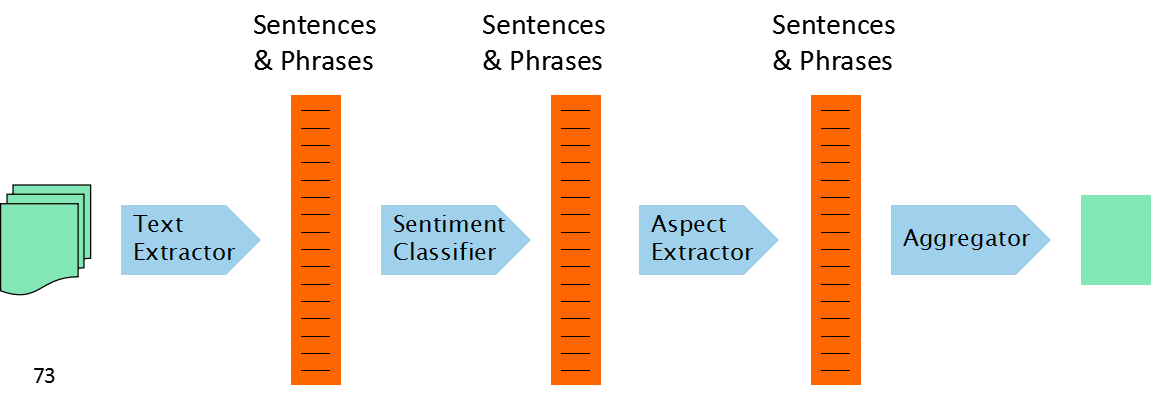


### Thank You